In [65]:
#load groundtruth excel
import pandas as pd
import os
ground_directory = os.path.abspath("../dataset/groundtruth/")
ground_path=os.path.join(ground_directory, "phq9.csv")
groundtruth=pd.read_csv(ground_path)
groundtruth.info()
display(groundtruth)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pid                 44 non-null     object 
 1   start_ts            44 non-null     object 
 2   end_ts              44 non-null     object 
 3   start_phq9          44 non-null     int64  
 4   end_phq9            40 non-null     float64
 5   depression_episode  44 non-null     int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 2.2+ KB


,pid,start_ts,end_ts,start_phq9,end_phq9,depression_episode
0,P08,7/21/22,8/9/22,6,1.0,0
1,P08,8/9/22,8/23/22,1,9.0,0
2,P10,7/21/22,8/9/22,8,7.0,1
3,P10,8/9/22,9/2/22,7,2.0,0
4,P12,7/22/22,8/9/22,10,12.0,1
5,P12,8/9/22,8/23/22,12,9.0,1
6,P13,7/25/22,8/9/22,1,3.0,0
7,P13,8/9/22,8/23/22,3,2.0,0
8,P14,7/25/22,8/8/22 0:00,11,NaN,0
9,P15,7/26/22,8/10/22,4,9.0,0


In [66]:
#clean ground truth data
import pandas as pd
# Find the dropped pids
dropped_pids = groundtruth.loc[groundtruth["end_phq9"].isna(), "pid"].tolist()
groundtruth=groundtruth.dropna(subset=["end_phq9"]).reset_index(drop=True)
# Print the dropped pids
print(f"pid dropped are: {dropped_pids}")
groundtruth["start_ts"]=pd.to_datetime(groundtruth["start_ts"], errors="coerce")
groundtruth["end_ts"]=pd.to_datetime(groundtruth["end_ts"], errors="coerce")
#drop one instance of p17 missing from dataset
groundtruth = groundtruth[~((groundtruth["pid"] == 'P17') & (groundtruth["start_phq9"] == 14))].reset_index(drop=True)

display(groundtruth)
groundtruth.info()

pid dropped are: ['P14', 'P25', 'P27', 'P34']


/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_4584/2572709312.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  groundtruth["start_ts"]=pd.to_datetime(groundtruth["start_ts"], errors="coerce")
/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_4584/2572709312.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  groundtruth["end_ts"]=pd.to_datetime(groundtruth["end_ts"], errors="coerce")


,pid,start_ts,end_ts,start_phq9,end_phq9,depression_episode
0,P08,2022-07-21,2022-08-09,6,1.0,0
1,P08,2022-08-09,2022-08-23,1,9.0,0
2,P10,2022-07-21,2022-08-09,8,7.0,1
3,P10,2022-08-09,2022-09-02,7,2.0,0
4,P12,2022-07-22,2022-08-09,10,12.0,1
5,P12,2022-08-09,2022-08-23,12,9.0,1
6,P13,2022-07-25,2022-08-09,1,3.0,0
7,P13,2022-08-09,2022-08-23,3,2.0,0
8,P15,2022-07-26,2022-08-10,4,9.0,0
9,P15,2022-08-10,2022-08-23,9,5.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   pid                 39 non-null     object        
 1   start_ts            39 non-null     datetime64[ns]
 2   end_ts              39 non-null     datetime64[ns]
 3   start_phq9          39 non-null     int64         
 4   end_phq9            39 non-null     float64       
 5   depression_episode  39 non-null     int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 2.0+ KB


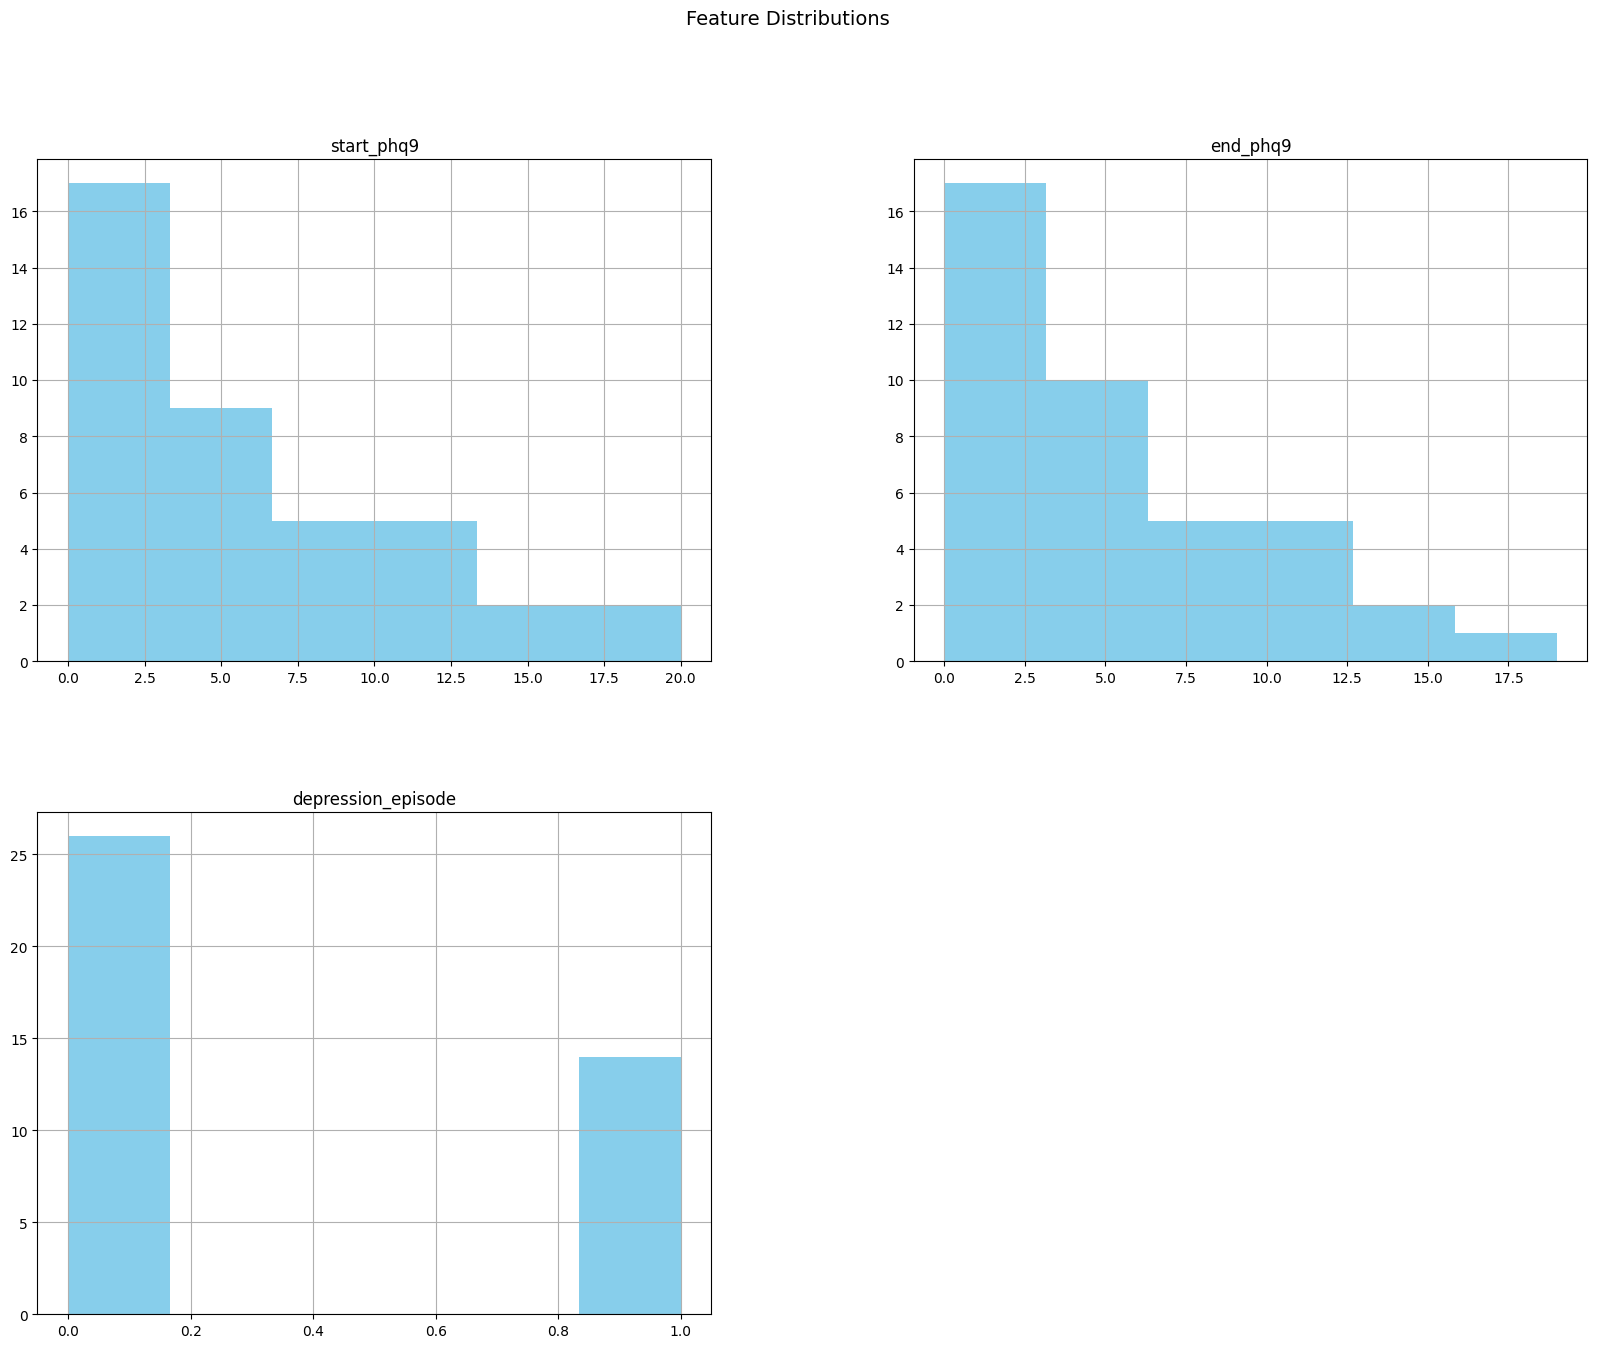

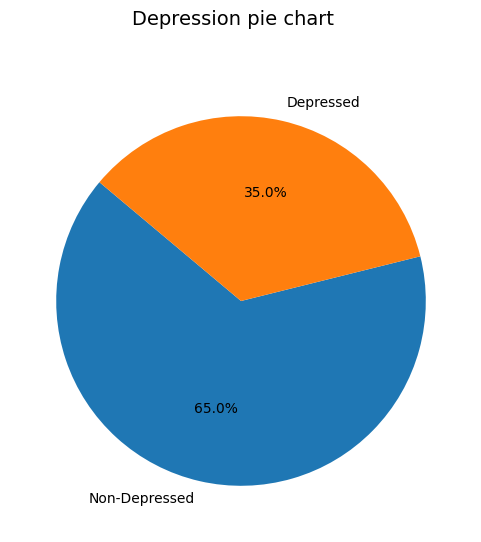

In [ ]:
#EDA groundtruth
import matplotlib.pyplot as plt
groundtruth.hist(figsize=(20, 15), bins=6, color='skyblue')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()
# Get value counts
depression_counts = groundtruth["depression_episode"].value_counts()
# Plot Pie Chart
# Rename labels
labels = depression_counts.index.map({1: "Depressed", 0: "Non-Depressed"})
plt.figure(figsize=(6, 6))
plt.pie(depression_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.suptitle("Depression pie chart", fontsize=14)
# Show the plot
plt.show()

In [39]:
#load json dataset
import json
import os
import pandas as pd
json_directory = os.path.abspath("../dataset/data/")
# List all JSON files in the directory
json_files = [f for f in os.listdir(json_directory) if f.endswith('.json')]
# Create an empty list to store extracted data
data_list = []
# Loop through each JSON file
for json_file in json_files:
    file_path = os.path.join(json_directory, json_file)
    with open(file_path, "r") as f:
        data = json.load(f)
        if isinstance(data, list):
            data_list.extend(data)  # Ensure list of dictionaries
        else:
            data_list.append(data)  # If it's a single dictionary, append it
# Convert list of JSON objects into a structured DataFrame
df = pd.json_normalize(data_list, sep="_")
# Display the first few rows
pd.set_option("display.max_columns", None)

display(df)


,boundingBox,contours,fileName,gameId,landmarks,timestamp,pid,classification_leftEyeOpenProbability,classification_rightEyeOpenProbability,classification_smilingProbability,headEulerAngle_X,headEulerAngle_Y,headEulerAngle_Z,metadata_appVersion,metadata_gameId,metadata_seq_id,metadata_timestamp,metadata_triggerName,au_AU01,au_AU02,au_AU04,au_AU06,au_AU07,au_AU10,au_AU12,au_AU14,au_AU15,au_AU17,au_AU23,au_AU24
0,-14 835 1089 1919,"[{'x': 512, 'y': 1012}, {'x': 579, 'y': 1012},...",/storage/emulated/0/DCIM/HiddenCam/2022-08-26-...,9b08217e-0ca4-4f7e-92f8-e55a39fe1c05,"[{'type': 0, 'x': 550.54803, 'y': 1789.8816}, ...",1661540666824,P21,0.994761,0.992931,0.010426,-4.881513,0.175707,2.570232,0.0.5,9b08217e-0ca4-4f7e-92f8-e55a39fe1c05,1661540590215,1661540666824,flowerGame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200 871 931 1618,"[{'x': 535, 'y': 934}, {'x': 585, 'y': 933}, {...",/storage/emulated/0/DCIM/HiddenCam/2022-08-23-...,b5a3ce65-f896-4929-bf4a-d06b6ad475c3,"[{'type': 0, 'x': 581.6955, 'y': 1494.7842}, {...",1661263366281,P21,0.990354,0.995583,0.006722,0.153201,-1.543784,4.104684,0.0.5,b5a3ce65-f896-4929-bf4a-d06b6ad475c3,1661263279421,1661263366281,flowerGame,-0.446513,-1.305582,-2.812059,1.591995,7.492649,-3.761609,-3.231098,-2.135083,-3.799604,1.714989,-0.248590,-15.851570
2,178 936 860 1604,"[{'x': 556, 'y': 990}, {'x': 599, 'y': 998}, {...",/storage/emulated/0/DCIM/HiddenCam/2022-08-09-...,52da674e-9f30-43db-8857-858a36ad33de,"[{'type': 0, 'x': 508.3537, 'y': 1482.4552}, {...",1660071665236,P21,0.988258,0.992232,0.003747,6.231903,0.866286,-5.533393,0.0.5,52da674e-9f30-43db-8857-858a36ad33de,1660071641060,1660071665236,flowerGame,-0.386842,0.317061,-4.495584,-4.417252,4.156268,-4.602196,-6.266154,6.466660,7.472216,3.648103,0.824292,-12.788689
3,28 1056 1312 2005,"[{'x': 638, 'y': 1258}, {'x': 726, 'y': 1256},...",/storage/emulated/0/DCIM/HiddenCam/2022-08-06-...,ef5aeeda-32c4-46b9-bbca-b70209994c53,"[{'type': 0, 'x': 684.9218, 'y': 2143.3005}, {...",1659812536345,P21,0.211136,0.906545,0.652535,-7.051201,-9.188964,3.848174,0.0.5,ef5aeeda-32c4-46b9-bbca-b70209994c53,1659812485638,1659812536345,flowerGame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-27 784 1163 1909,"[{'x': 523, 'y': 963}, {'x': 596, 'y': 961}, {...",/storage/emulated/0/DCIM/HiddenCam/2022-08-16-...,ba5281b7-ab2a-4098-8a6f-c9977306eaa7,"[{'type': 0, 'x': 602.7415, 'y': 1799.8873}, {...",1660661352612,P21,0.990865,0.938204,0.008071,-4.390600,-0.422799,5.333356,0.0.5,ba5281b7-ab2a-4098-8a6f-c9977306eaa7,1660661263672,1660661352612,flowerGame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399276,-11 1184 974 2170,"[{'x': 417, 'y': 1280}, {'x': 483, 'y': 1277},...",/storage/emulated/0/DCIM/HiddenCam/2022-08-13-...,45a5a880-bf8e-4a09-8070-e2dc5e5a202a,"[{'type': 0, 'x': 464.82196, 'y': 1967.1857}, ...",1660403827367,P18,0.990354,0.996827,0.007616,7.273943,-8.872025,3.136459,0.0.5,45a5a880-bf8e-4a09-8070-e2dc5e5a202a,1660403737335,1660403827367,flowerGame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399277,341 902 1174 1753,"[{'x': 737, 'y': 995}, {'x': 792, 'y': 996}, {...",/storage/emulated/0/DCIM/HiddenCam/2022-08-06-...,c7bca2d2-d747-47ae-8798-2118bac7f1b2,"[{'type': 0, 'x': 743.52686, 'y': 1539.5918}, ...",1659819796588,P18,0.029205,0.024098,0.031306,11.071193,-3.039715,0.638989,0.0.5,c7bca2d2-d747-47ae-8798-2118bac7f1b2,1659819764387,1659819796588,flowerGame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399278,284 1090 1118 1941,"[{'x': 683, 'y': 1172}, {'x': 735, 'y': 1174},...",/storage/emulated/0/DCIM/HiddenCam/2022-08-14-...,appUsage,"[{'type': 0, 'x': 711.18884, 'y': 1767.9626}, ...",1660509382034,P18,0.279111,0.029933,0.128848,17.421429,0.912104,1.022833,0.0.5,appUsage,1660509378843,1660509382034,com.android.chrome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399279,292 1226 1143 2095,"[{'x': 699, 'y': 12

In [52]:
excel_dir=os.path.abspath("../dataset/processed/")
excel_path=os.path.join(excel_dir, "features_raw.csv")
df=pd.read_csv(excel_path)
# Select relevant features
columns_to_keep = [
    "pid", "boundingBox", "classification_leftEyeOpenProbability", 
    "classification_rightEyeOpenProbability", "classification_smilingProbability",
    "headEulerAngle_X", "headEulerAngle_Y", "headEulerAngle_Z", "au_AU01", "au_AU02",
    "au_AU04", "au_AU06", "au_AU07", "au_AU10", "au_AU12", "au_AU14", "au_AU15",
    "au_AU17", "au_AU23", "au_AU24", "fileName"
]
# Ensure columns exist before extraction
df_extracted = df.reindex(columns=columns_to_keep, fill_value=None)
df_extracted=df_extracted.rename(columns={"fileName": "date"})
# date formatting
df_extracted["date"]=df_extracted["date"].str.extract(r'(2.{9})')
df_extracted["date"]=pd.to_datetime(df_extracted["date"])
# pid filtering based on ground data pid dropped are: ['P14', 'P25', 'P27', 'P34']
pids_todrop=['P14', 'P25', 'P27', 'P34']
df_extracted=df_extracted[~df_extracted["pid"].isin(pids_todrop)].reset_index(drop=True)
# Display the extracted structured DataFrame
display(df_extracted)
#display(df_extracted[df_extracted["pid"].isin(['P14', 'P25', 'P27', 'P34'])])


,pid,boundingBox,classification_leftEyeOpenProbability,classification_rightEyeOpenProbability,classification_smilingProbability,headEulerAngle_X,headEulerAngle_Y,headEulerAngle_Z,au_AU01,au_AU02,au_AU04,au_AU06,au_AU07,au_AU10,au_AU12,au_AU14,au_AU15,au_AU17,au_AU23,au_AU24,date
0,P21,-14 835 1089 1919,0.994761,0.992931,0.010426,-4.881513,0.175707,2.570232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-26
1,P21,200 871 931 1618,0.990354,0.995583,0.006722,0.153201,-1.543784,4.104684,-0.446513,-1.305582,-2.812059,1.591995,7.492649,-3.761609,-3.231098,-2.135083,-3.799604,1.714989,-0.248590,-15.851570,2022-08-23
2,P21,178 936 860 1604,0.988258,0.992232,0.003747,6.231903,0.866286,-5.533393,-0.386842,0.317061,-4.495584,-4.417252,4.156268,-4.602196,-6.266154,6.466660,7.472216,3.648103,0.824292,-12.788689,2022-08-09
3,P21,28 1056 1312 2005,0.211136,0.906545,0.652535,-7.051201,-9.188964,3.848174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-06
4,P21,-27 784 1163 1909,0.990865,0.938204,0.008071,-4.390600,-0.422799,5.333356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373055,P18,-11 1184 974 2170,0.990354,0.996827,0.007616,7.273943,-8.872025,3.136459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-13
373056,P18,341 902 1174 1753,0.029205,0.024098,0.031306,11.071193,-3.039715,0.638989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-06
373057,P18,284 1090 1118 1941,0.279111,0.029933,0.128848,17.421429,0.912104,1.022833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-14
373058,P18,292 1226 1143 2095,0.031943,0.020863,0.539508,12.875384,1.750542,1.901327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-22


In [53]:
#check missing values
print(df_extracted.info())
print(df_extracted.describe())
missing_values=df_extracted.isnull().sum()
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373060 entries, 0 to 373059
Data columns (total 21 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   pid                                     373060 non-null  object        
 1   boundingBox                             373060 non-null  object        
 2   classification_leftEyeOpenProbability   364218 non-null  float64       
 3   classification_rightEyeOpenProbability  364218 non-null  float64       
 4   classification_smilingProbability       364218 non-null  float64       
 5   headEulerAngle_X                        373060 non-null  float64       
 6   headEulerAngle_Y                        373060 non-null  float64       
 7   headEulerAngle_Z                        373060 non-null  float64       
 8   au_AU01                                 186449 non-null  float64       
 9   au_AU02                              

In [48]:
#mismatch check between groundtruth and dataset
missing_pid_ground=groundtruth[~groundtruth["pid"].isin(df_extracted["pid"])]
missing_pid_data=df_extracted[~df_extracted["pid"].isin(groundtruth["pid"])]
if (missing_pid_data.empty) and (missing_pid_ground.empty):
    print("No missing pids ✅")

No missing pids ✅


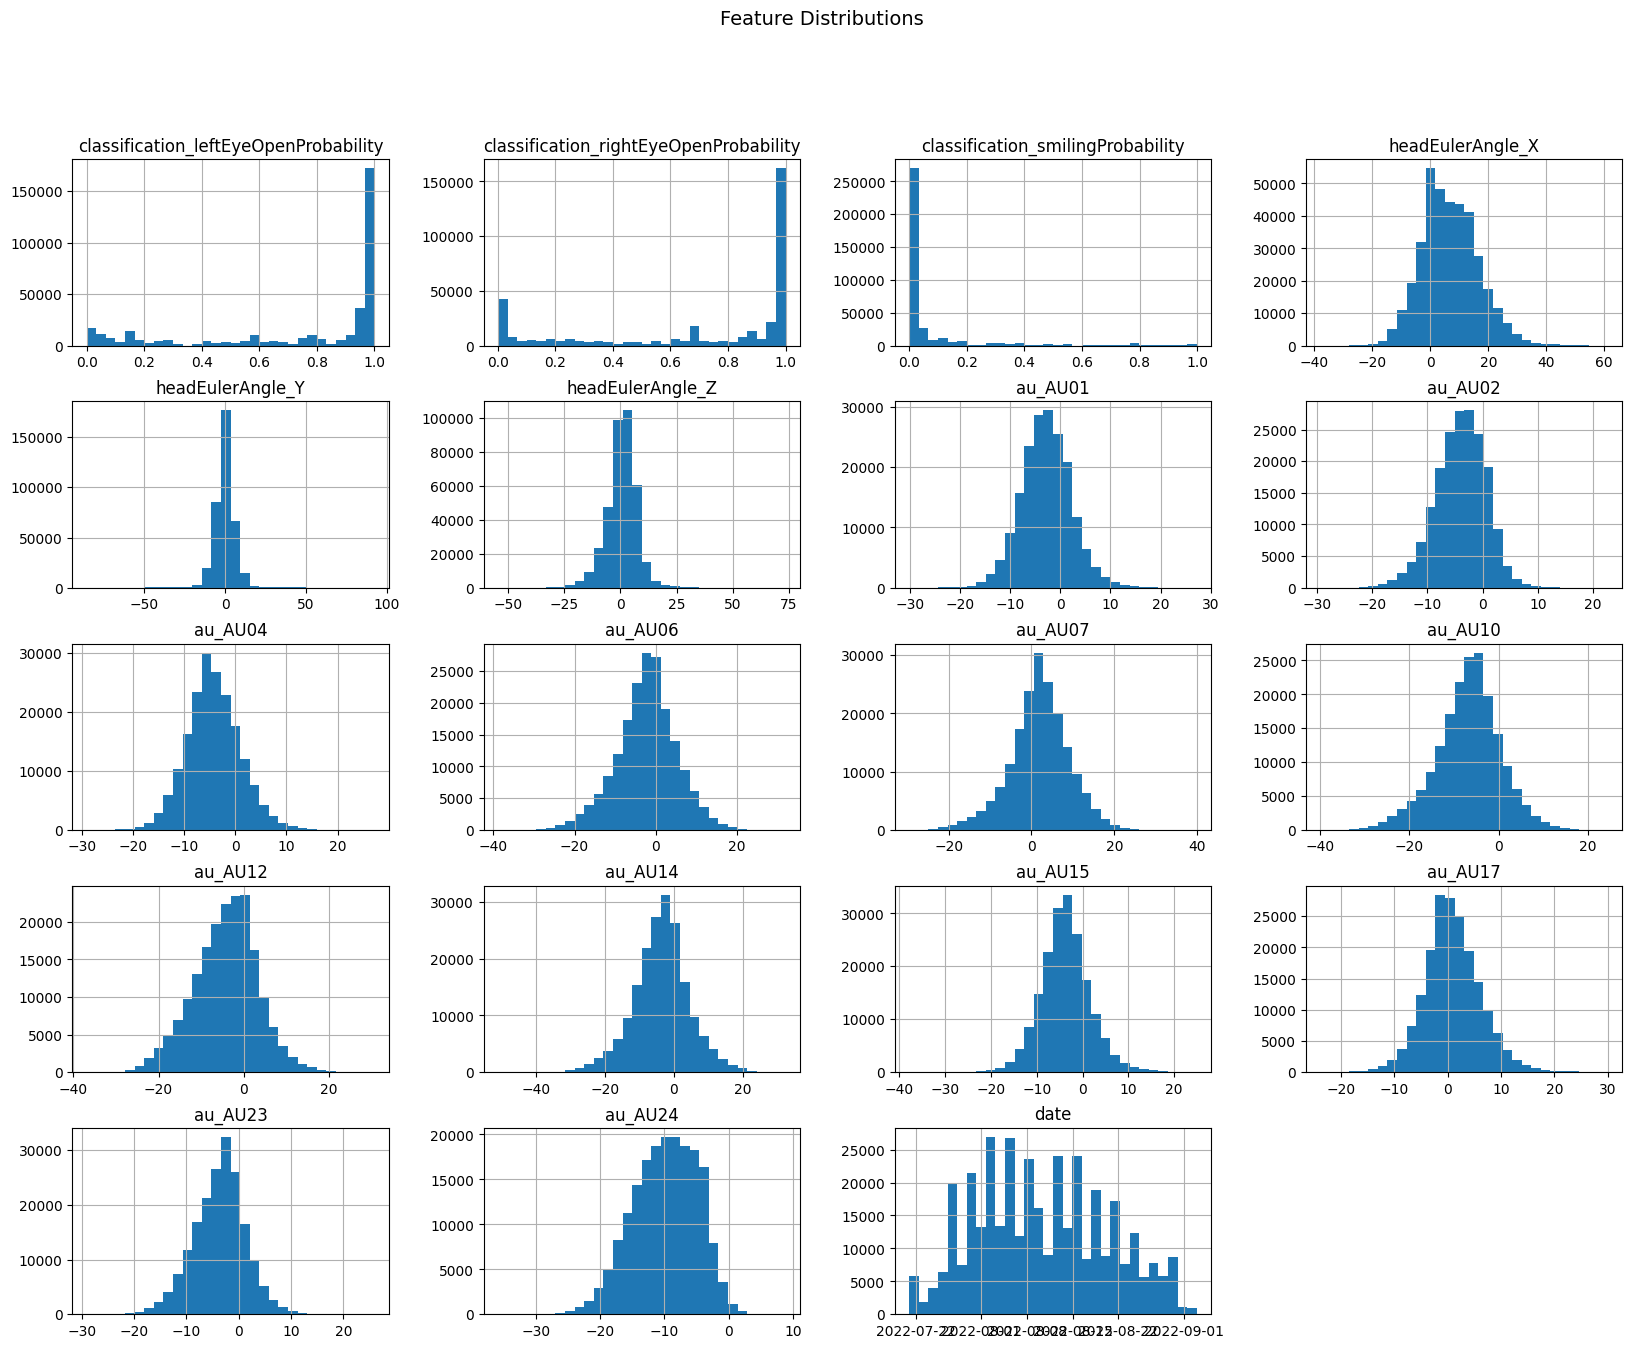

In [49]:
#feature distribution
#Histogram
import matplotlib.pyplot as plt
df_extracted.hist(figsize=(20, 15), bins=30)
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


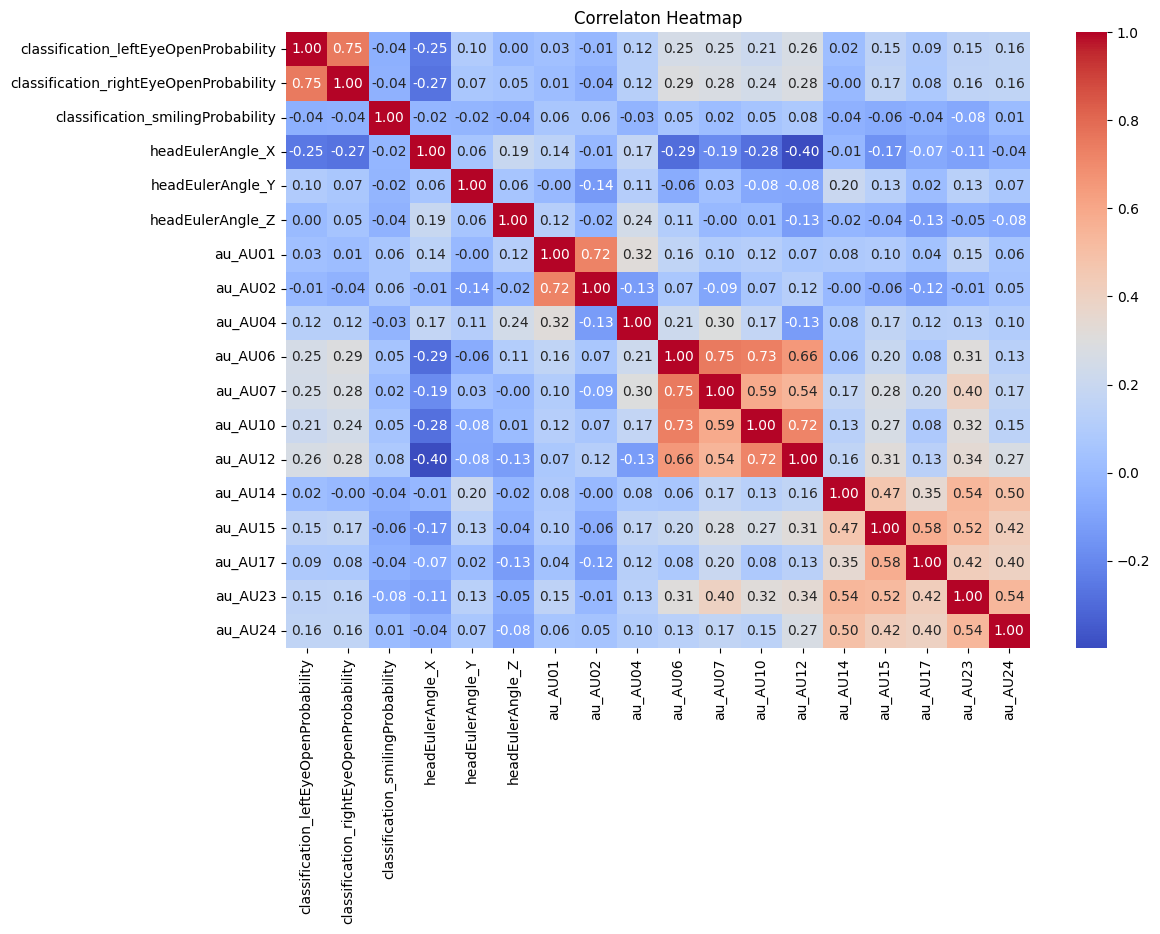

In [50]:
#Heatmap correlation analysis
import seaborn as sns
plt.figure(figsize=(12,8))
df_num=df_extracted.select_dtypes(include="number")
sns.heatmap(df_num.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlaton Heatmap")
plt.show()

In [80]:
#matching dates between ground truth and data set
import pandas as pd
# Merge datasets on 'pid' (inner join keeps only matching pids)
merged_df = df_extracted.merge(groundtruth[["pid", "start_ts", "end_ts"]], on="pid", how="inner")
display(merged_df)
# Filter rows where 'date' is within 'start_ts' and 'end_ts'
filtered_df = merged_df[(merged_df["date"] >= merged_df["start_ts"]) & (merged_df["date"] <= merged_df["end_ts"])]
display(filtered_df)
# Group by pid, start_ts, and end_ts, then compute the mean of all numeric columns
aggregated_df = filtered_df.groupby(["pid", "start_ts", "end_ts"]).mean(numeric_only=True).reset_index()
display(aggregated_df)
print(aggregated_df.info())

,pid,boundingBox,classification_leftEyeOpenProbability,classification_rightEyeOpenProbability,classification_smilingProbability,headEulerAngle_X,headEulerAngle_Y,headEulerAngle_Z,au_AU01,au_AU02,au_AU04,au_AU06,au_AU07,au_AU10,au_AU12,au_AU14,au_AU15,au_AU17,au_AU23,au_AU24,date,start_ts,end_ts
0,P21,-14 835 1089 1919,0.994761,0.992931,0.010426,-4.881513,0.175707,2.570232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-26,2022-07-28,2022-08-11
1,P21,-14 835 1089 1919,0.994761,0.992931,0.010426,-4.881513,0.175707,2.570232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-26,2022-08-11,2022-08-30
2,P21,200 871 931 1618,0.990354,0.995583,0.006722,0.153201,-1.543784,4.104684,-0.446513,-1.305582,-2.812059,1.591995,7.492649,-3.761609,-3.231098,-2.135083,-3.799604,1.714989,-0.248590,-15.851570,2022-08-23,2022-07-28,2022-08-11
3,P21,200 871 931 1618,0.990354,0.995583,0.006722,0.153201,-1.543784,4.104684,-0.446513,-1.305582,-2.812059,1.591995,7.492649,-3.761609,-3.231098,-2.135083,-3.799604,1.714989,-0.248590,-15.851570,2022-08-23,2022-08-11,2022-08-30
4,P21,178 936 860 1604,0.988258,0.992232,0.003747,6.231903,0.866286,-5.533393,-0.386842,0.317061,-4.495584,-4.417252,4.156268,-4.602196,-6.266154,6.466660,7.472216,3.648103,0.824292,-12.788689,2022-08-09,2022-07-28,2022-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723417,P18,284 1090 1118 1941,0.279111,0.029933,0.128848,17.421429,0.912104,1.022833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-14,2022-08-09,2022-08-23
723418,P18,292 1226 1143 2095,0.031943,0.020863,0.539508,12.875384,1.750542,1.901327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-22,2022-07-27,2022-08-09
723419,P18,292 1226 1143 2095,0.031943,0.020863,0.539508,12.875384,1.750542,1.901327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-22,2022-08-09,2022-08-23
723420,P18,267 1096 1136 1984,0.062496,0.688493,0.147068,15.689628,-2.673552,9.460271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-13,2022-07-27,2022-08-09


,pid,boundingBox,classification_leftEyeOpenProbability,classification_rightEyeOpenProbability,classification_smilingProbability,headEulerAngle_X,headEulerAngle_Y,headEulerAngle_Z,au_AU01,au_AU02,au_AU04,au_AU06,au_AU07,au_AU10,au_AU12,au_AU14,au_AU15,au_AU17,au_AU23,au_AU24,date,start_ts,end_ts
1,P21,-14 835 1089 1919,0.994761,0.992931,0.010426,-4.881513,0.175707,2.570232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-26,2022-08-11,2022-08-30
3,P21,200 871 931 1618,0.990354,0.995583,0.006722,0.153201,-1.543784,4.104684,-0.446513,-1.305582,-2.812059,1.591995,7.492649,-3.761609,-3.231098,-2.135083,-3.799604,1.714989,-0.248590,-15.851570,2022-08-23,2022-08-11,2022-08-30
4,P21,178 936 860 1604,0.988258,0.992232,0.003747,6.231903,0.866286,-5.533393,-0.386842,0.317061,-4.495584,-4.417252,4.156268,-4.602196,-6.266154,6.466660,7.472216,3.648103,0.824292,-12.788689,2022-08-09,2022-07-28,2022-08-11
6,P21,28 1056 1312 2005,0.211136,0.906545,0.652535,-7.051201,-9.188964,3.848174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-06,2022-07-28,2022-08-11
9,P21,-27 784 1163 1909,0.990865,0.938204,0.008071,-4.390600,-0.422799,5.333356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-16,2022-08-11,2022-08-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723413,P18,-11 1184 974 2170,0.990354,0.996827,0.007616,7.273943,-8.872025,3.136459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-13,2022-08-09,2022-08-23
723414,P18,341 902 1174 1753,0.029205,0.024098,0.031306,11.071193,-3.039715,0.638989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-06,2022-07-27,2022-08-09
723417,P18,284 1090 1118 1941,0.279111,0.029933,0.128848,17.421429,0.912104,1.022833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-14,2022-08-09,2022-08-23
723419,P18,292 1226 1143 2095,0.031943,0.020863,0.539508,12.875384,1.750542,1.901327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-22,2022-08-09,2022-08-23


,pid,start_ts,end_ts,classification_leftEyeOpenProbability,classification_rightEyeOpenProbability,classification_smilingProbability,headEulerAngle_X,headEulerAngle_Y,headEulerAngle_Z,au_AU01,au_AU02,au_AU04,au_AU06,au_AU07,au_AU10,au_AU12,au_AU14,au_AU15,au_AU17,au_AU23,au_AU24
0,P08,2022-07-21,2022-08-09,0.830408,0.816194,0.086731,-3.590385,1.154215,-6.597269,-4.155006,-4.378868,-8.624779,-3.141514,2.544851,-6.854901,0.258108,-2.772515,-0.797849,3.262581,-2.414027,-7.155373
1,P08,2022-08-09,2022-08-23,0.866476,0.783151,0.087046,-2.542657,-0.037007,-5.791328,-3.581912,-3.881810,-7.530452,-3.070777,3.504025,-6.949071,-0.008830,-3.597415,-1.767373,5.021548,-2.346750,-7.213998
2,P10,2022-07-21,2022-08-09,0.872474,0.723704,0.073868,5.629133,-2.491507,-0.936220,-3.576638,-1.914212,-6.459235,-2.157781,0.818804,-4.409811,-0.190074,-0.321380,-1.927072,0.210064,-2.927345,-5.034498
3,P10,2022-08-09,2022-09-02,0.744981,0.617477,0.086086,11.238853,-1.394169,-0.547956,-5.397129,-3.150589,-6.411118,-3.743132,1.318523,-6.753433,-2.546486,-0.367058,-3.428196,1.148197,-4.171587,-4.714279
4,P12,2022-07-22,2022-08-09,0.733774,0.744132,0.136726,12.755634,1.032336,3.674352,-1.113660,-0.902324,-5.695314,-3.511859,1.557235,-7.418296,-3.124878,-2.669146,-3.920065,-0.875830,-4.136342,-7.877492
5,P12,2022-08-09,2022-08-23,0.773316,0.739404,0.122617,12.572520,2.114207,4.603671,-1.650913,-1.694220,-4.088613,-2.208693,1.808383,-4.984248,-2.537302,-0.345764,-3.012092,-1.014900,-3.321621,-7.685353
6,P13,2022-07-25,2022-08-09,0.961697,0.939809,0.057795,3.594297,9.349583,4.682816,-2.957145,-5.977918,-1.397336,3.330504,4.667992,-5.524657,-2.682109,-0.987411,0.437888,4.656065,-1.593660,-7.710907
7,P13,2022-08-09,2022-08-23,0.950943,0.959896,0.033666,-2.716751,9.357901,3.242725,-4.509920,-8.606077,-2.405718,5.059719,8.363407,-4.905379,-0.475653,14.743302,0.457251,6.228081,0.690131,-1.802754
8,P15,2022-07-26,2022-08-10,0.615009,0.582760,0.059035,14.078795,-0.094071,1.765197,-2.733374,-3.469949,-3.693660,-3.793609,2.001516,-8.242668,-6.342423,-5.388016,-4.046798,-0.708242,-4.234445,-11.321276
9,P15,2022-08-10,2022-08-23,0.554908,0.466006,0.085277,15.065385,0.220933,1.650863,-2.970178,-2.155303,-4.867792,-7.045517,-1.545484,-10.502649,-8.872644,-8.097215,-5.999773,-1.627384,-7.709262,-13.634887


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   pid                                     39 non-null     object        
 1   start_ts                                39 non-null     datetime64[ns]
 2   end_ts                                  39 non-null     datetime64[ns]
 3   classification_leftEyeOpenProbability   39 non-null     float64       
 4   classification_rightEyeOpenProbability  39 non-null     float64       
 5   classification_smilingProbability       39 non-null     float64       
 6   headEulerAngle_X                        39 non-null     float64       
 7   headEulerAngle_Y                        39 non-null     float64       
 8   headEulerAngle_Z                        39 non-null     float64       
 9   au_AU01                                 39 non-null     

In [67]:
#mismatch check between groundtruth and dataset
aggregated_df['pid'].value_counts()-groundtruth['pid'].value_counts() #p17 is missing 

pid
P08    0
P10    0
P35    0
P33    0
P31    0
P30    0
P29    0
P24    0
P23    0
P21    0
P20    0
P19    0
P18    0
P16    0
P15    0
P13    0
P12    0
P38    0
P28    0
P17    0
P36    0
Name: count, dtype: int64

/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_4584/453276888.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  aggregated_df=pd.read_csv(excel_path, parse_dates=["start_ts", "end_ts"])
/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_4584/453276888.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  aggregated_df=pd.read_csv(excel_path, parse_dates=["start_ts", "end_ts"])


,pid,start_ts,end_ts,classification_leftEyeOpenProbability,classification_rightEyeOpenProbability,classification_smilingProbability,headEulerAngle_X,headEulerAngle_Y,headEulerAngle_Z,au_AU01,au_AU02,au_AU04,au_AU06,au_AU07,au_AU10,au_AU12,au_AU14,au_AU15,au_AU17,au_AU23,au_AU24
0,P08,2022-07-21,2022-08-09,0.830408,0.816194,0.086731,-3.590385,1.154215,-6.597269,-4.155006,-4.378868,-8.624779,-3.141514,2.544851,-6.854901,0.258108,-2.772515,-0.797849,3.262581,-2.414027,-7.155373
1,P08,2022-08-09,2022-08-23,0.866476,0.783151,0.087046,-2.542657,-0.037007,-5.791328,-3.581912,-3.881810,-7.530452,-3.070777,3.504025,-6.949071,-0.008830,-3.597415,-1.767373,5.021548,-2.346750,-7.213998
2,P10,2022-07-21,2022-08-09,0.872474,0.723704,0.073868,5.629133,-2.491507,-0.936220,-3.576638,-1.914212,-6.459235,-2.157781,0.818804,-4.409811,-0.190074,-0.321380,-1.927072,0.210064,-2.927345,-5.034498
3,P10,2022-08-09,2022-09-02,0.744981,0.617477,0.086086,11.238853,-1.394169,-0.547956,-5.397129,-3.150589,-6.411118,-3.743132,1.318523,-6.753433,-2.546486,-0.367058,-3.428196,1.148197,-4.171587,-4.714279
4,P12,2022-07-22,2022-08-09,0.733774,0.744132,0.136726,12.755634,1.032336,3.674352,-1.113660,-0.902324,-5.695314,-3.511859,1.557235,-7.418296,-3.124878,-2.669146,-3.920065,-0.875830,-4.136342,-7.877492
5,P12,2022-08-09,2022-08-23,0.773316,0.739404,0.122617,12.572520,2.114207,4.603671,-1.650913,-1.694220,-4.088613,-2.208693,1.808383,-4.984248,-2.537302,-0.345764,-3.012092,-1.014900,-3.321621,-7.685353
6,P13,2022-07-25,2022-08-09,0.961697,0.939809,0.057795,3.594297,9.349583,4.682816,-2.957145,-5.977918,-1.397336,3.330504,4.667992,-5.524657,-2.682109,-0.987411,0.437888,4.656065,-1.593660,-7.710907
7,P13,2022-08-09,2022-08-23,0.950943,0.959896,0.033666,-2.716751,9.357901,3.242725,-4.509920,-8.606077,-2.405718,5.059719,8.363407,-4.905379,-0.475653,14.743302,0.457251,6.228081,0.690131,-1.802754
8,P15,2022-07-26,2022-08-10,0.615009,0.582760,0.059035,14.078795,-0.094071,1.765197,-2.733374,-3.469949,-3.693660,-3.793609,2.001516,-8.242668,-6.342423,-5.388016,-4.046798,-0.708242,-4.234445,-11.321276
9,P15,2022-08-10,2022-08-23,0.554908,0.466006,0.085277,15.065385,0.220933,1.650863,-2.970178,-2.155303,-4.867792,-7.045517,-1.545484,-10.502649,-8.872644,-8.097215,-5.999773,-1.627384,-7.709262,-13.634887


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   pid                                     39 non-null     object        
 1   start_ts                                39 non-null     datetime64[ns]
 2   end_ts                                  39 non-null     datetime64[ns]
 3   classification_leftEyeOpenProbability   39 non-null     float64       
 4   classification_rightEyeOpenProbability  39 non-null     float64       
 5   classification_smilingProbability       39 non-null     float64       
 6   headEulerAngle_X                        39 non-null     float64       
 7   headEulerAngle_Y                        39 non-null     float64       
 8   headEulerAngle_Z                        39 non-null     float64       
 9   au_AU01                                 39 non-null     

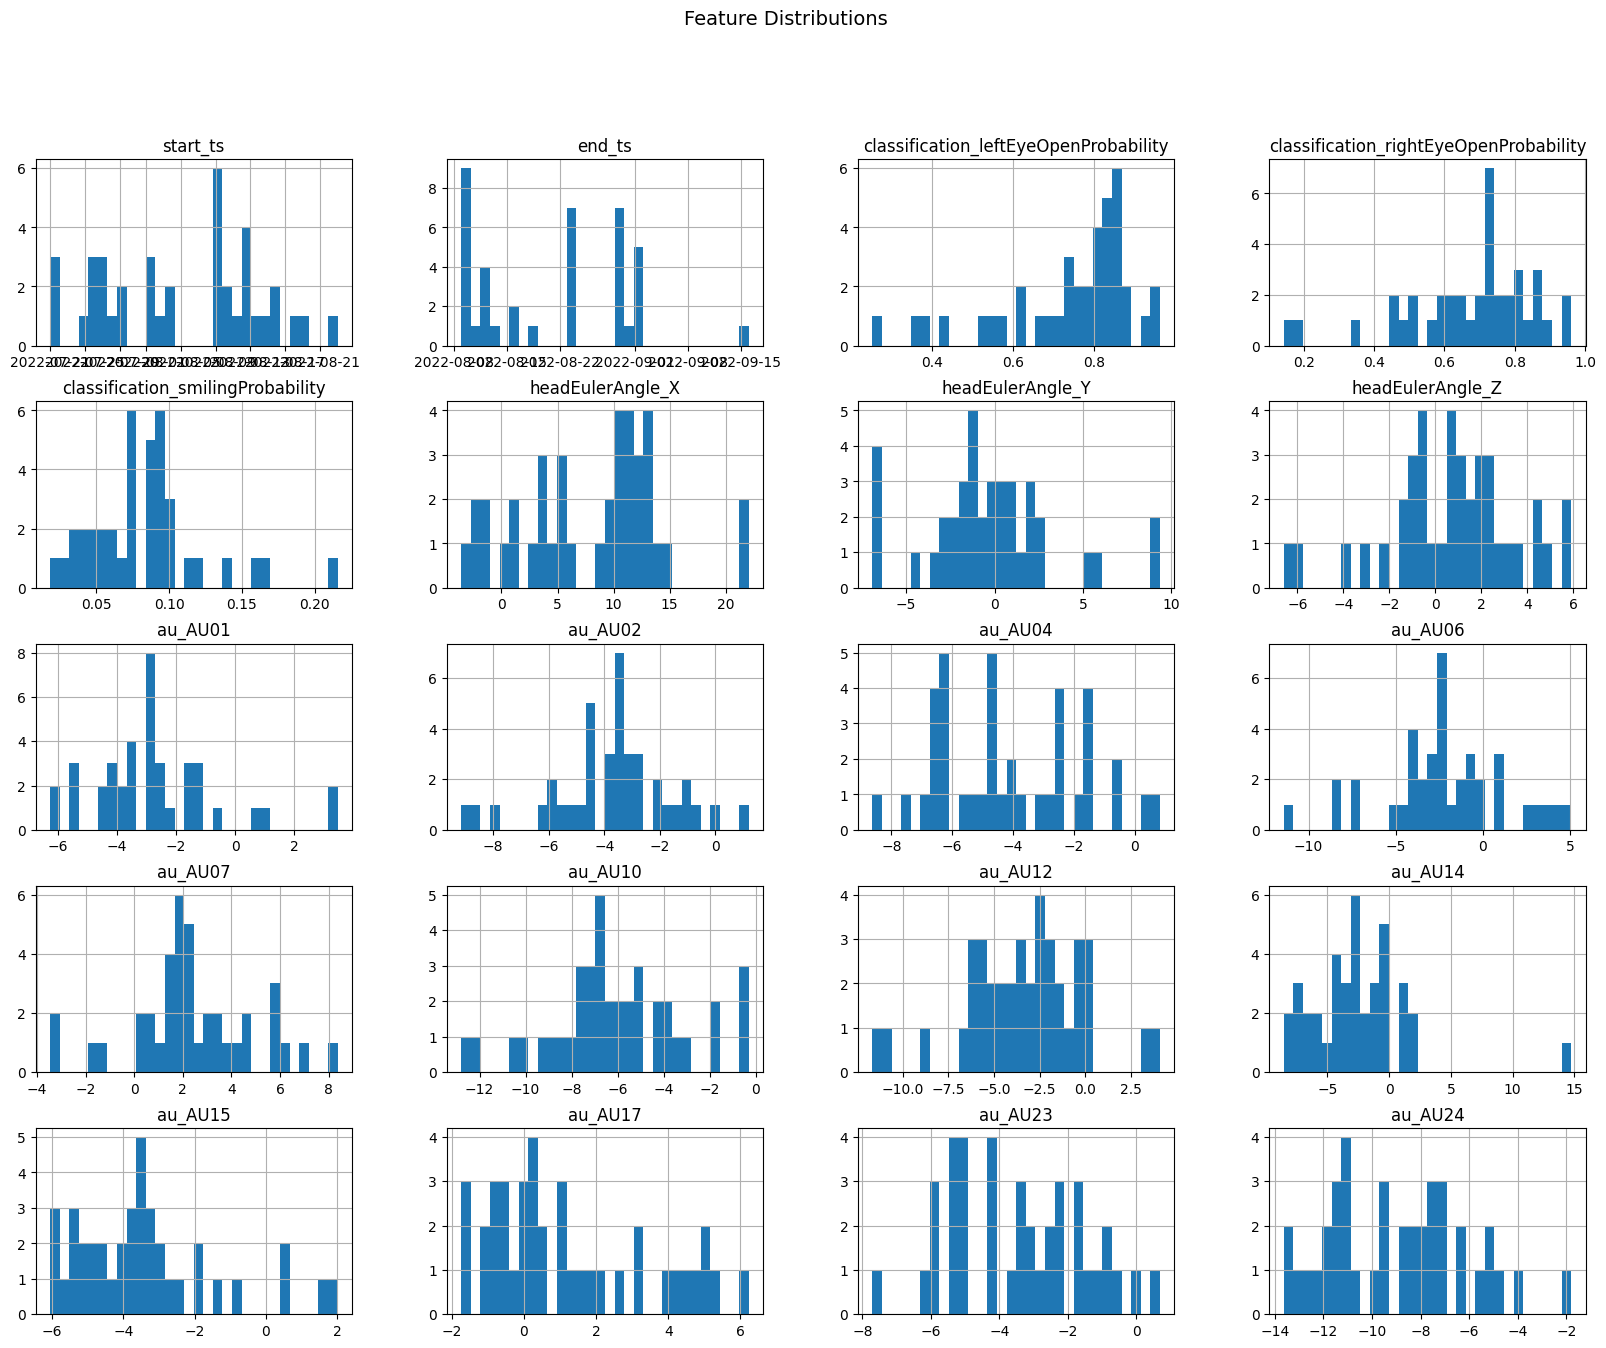

,pid,start_ts,end_ts,classification_leftEyeOpenProbability,classification_rightEyeOpenProbability,classification_smilingProbability,headEulerAngle_X,headEulerAngle_Y,headEulerAngle_Z,au_AU01,au_AU02,au_AU04,au_AU06,au_AU07,au_AU10,au_AU12,au_AU14,au_AU15,au_AU17,au_AU23,au_AU24,depression_episode
0,P08,2022-07-21,2022-08-09,0.830408,0.816194,0.086731,-3.590385,1.154215,-6.597269,-4.155006,-4.378868,-8.624779,-3.141514,2.544851,-6.854901,0.258108,-2.772515,-0.797849,3.262581,-2.414027,-7.155373,0
1,P08,2022-08-09,2022-08-23,0.866476,0.783151,0.087046,-2.542657,-0.037007,-5.791328,-3.581912,-3.881810,-7.530452,-3.070777,3.504025,-6.949071,-0.008830,-3.597415,-1.767373,5.021548,-2.346750,-7.213998,0
2,P10,2022-07-21,2022-08-09,0.872474,0.723704,0.073868,5.629133,-2.491507,-0.936220,-3.576638,-1.914212,-6.459235,-2.157781,0.818804,-4.409811,-0.190074,-0.321380,-1.927072,0.210064,-2.927345,-5.034498,1
3,P10,2022-08-09,2022-09-02,0.744981,0.617477,0.086086,11.238853,-1.394169,-0.547956,-5.397129,-3.150589,-6.411118,-3.743132,1.318523,-6.753433,-2.546486,-0.367058,-3.428196,1.148197,-4.171587,-4.714279,0
4,P12,2022-07-22,2022-08-09,0.733774,0.744132,0.136726,12.755634,1.032336,3.674352,-1.113660,-0.902324,-5.695314,-3.511859,1.557235,-7.418296,-3.124878,-2.669146,-3.920065,-0.875830,-4.136342,-7.877492,1
5,P12,2022-08-09,2022-08-23,0.773316,0.739404,0.122617,12.572520,2.114207,4.603671,-1.650913,-1.694220,-4.088613,-2.208693,1.808383,-4.984248,-2.537302,-0.345764,-3.012092,-1.014900,-3.321621,-7.685353,1
6,P13,2022-07-25,2022-08-09,0.961697,0.939809,0.057795,3.594297,9.349583,4.682816,-2.957145,-5.977918,-1.397336,3.330504,4.667992,-5.524657,-2.682109,-0.987411,0.437888,4.656065,-1.593660,-7.710907,0
7,P13,2022-08-09,2022-08-23,0.950943,0.959896,0.033666,-2.716751,9.357901,3.242725,-4.509920,-8.606077,-2.405718,5.059719,8.363407,-4.905379,-0.475653,14.743302,0.457251,6.228081,0.690131,-1.802754,0
8,P15,2022-07-26,2022-08-10,0.615009,0.582760,0.059035,14.078795,-0.094071,1.765197,-2.733374,-3.469949,-3.693660,-3.793609,2.001516,-8.242668,-6.342423,-5.388016,-4.046798,-0.708242,-4.234445,-11.321276,0
9,P15,2022-08-10,2022-08-23,0.554908,0.466006,0.085277,15.065385,0.220933,1.650863,-2.970178,-2.155303,-4.867792,-7.045517,-1.545484,-10.502649,-8.872644,-8.097215,-5.999773,-1.627384,-7.709262,-13.634887,1


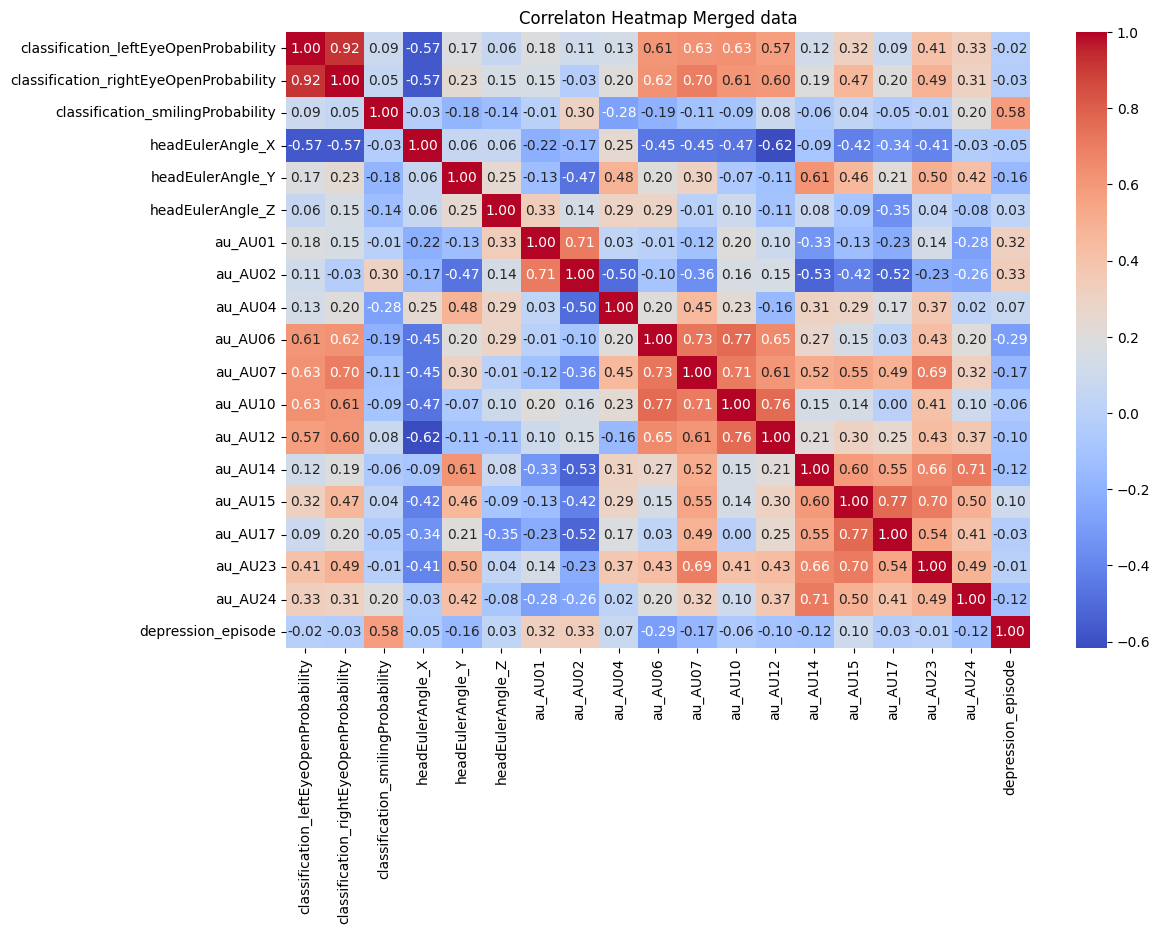

In [85]:
#aggregated data eda
excel_dir=os.path.abspath("../dataset/processed/")
excel_path=os.path.join(excel_dir, "features_aggregated.csv")
aggregated_df=pd.read_csv(excel_path, parse_dates=["start_ts", "end_ts"])
display(aggregated_df)
print(aggregated_df.info())

#feature distribution
#Histogram
aggregated_df.hist(figsize=(20, 15), bins=30)
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()
#heatmap correlation
merged_df = aggregated_df.merge(groundtruth[["pid", "start_ts", "end_ts", "depression_episode"]], on=["pid", "start_ts", "end_ts"], how="inner")
display(merged_df)
plt.figure(figsize=(12,8))
merg_num=merged_df.select_dtypes(include="number")
sns.heatmap(merg_num.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlaton Heatmap Merged data")
plt.show()

In [87]:
#aggregated data eda
excel_dir=os.path.abspath("../dataset/processed/")
excel_path=os.path.join(excel_dir, "features_groundtruth_merged.csv")
merged_df=pd.read_csv(excel_path, parse_dates=["start_ts", "end_ts"])
display(merged_df)
print(merged_df.info())

,pid,start_ts,end_ts,classification_leftEyeOpenProbability,classification_rightEyeOpenProbability,classification_smilingProbability,headEulerAngle_X,headEulerAngle_Y,headEulerAngle_Z,au_AU01,au_AU02,au_AU04,au_AU06,au_AU07,au_AU10,au_AU12,au_AU14,au_AU15,au_AU17,au_AU23,au_AU24,depression_episode
0,P08,2022-07-21,2022-08-09,0.830408,0.816194,0.086731,-3.590385,1.154215,-6.597269,-4.155006,-4.378868,-8.624779,-3.141514,2.544851,-6.854901,0.258108,-2.772515,-0.797849,3.262581,-2.414027,-7.155373,0
1,P08,2022-08-09,2022-08-23,0.866476,0.783151,0.087046,-2.542657,-0.037007,-5.791328,-3.581912,-3.881810,-7.530452,-3.070777,3.504025,-6.949071,-0.008830,-3.597415,-1.767373,5.021548,-2.346750,-7.213998,0
2,P10,2022-07-21,2022-08-09,0.872474,0.723704,0.073868,5.629133,-2.491507,-0.936220,-3.576638,-1.914212,-6.459235,-2.157781,0.818804,-4.409811,-0.190074,-0.321380,-1.927072,0.210064,-2.927345,-5.034498,1
3,P10,2022-08-09,2022-09-02,0.744981,0.617477,0.086086,11.238853,-1.394169,-0.547956,-5.397129,-3.150589,-6.411118,-3.743132,1.318523,-6.753433,-2.546486,-0.367058,-3.428196,1.148197,-4.171587,-4.714279,0
4,P12,2022-07-22,2022-08-09,0.733774,0.744132,0.136726,12.755634,1.032336,3.674352,-1.113660,-0.902324,-5.695314,-3.511859,1.557235,-7.418296,-3.124878,-2.669146,-3.920065,-0.875830,-4.136342,-7.877492,1
5,P12,2022-08-09,2022-08-23,0.773316,0.739404,0.122617,12.572520,2.114207,4.603671,-1.650913,-1.694220,-4.088613,-2.208693,1.808383,-4.984248,-2.537302,-0.345764,-3.012092,-1.014900,-3.321621,-7.685353,1
6,P13,2022-07-25,2022-08-09,0.961697,0.939809,0.057795,3.594297,9.349583,4.682816,-2.957145,-5.977918,-1.397336,3.330504,4.667992,-5.524657,-2.682109,-0.987411,0.437888,4.656065,-1.593660,-7.710907,0
7,P13,2022-08-09,2022-08-23,0.950943,0.959896,0.033666,-2.716751,9.357901,3.242725,-4.509920,-8.606077,-2.405718,5.059719,8.363407,-4.905379,-0.475653,14.743302,0.457251,6.228081,0.690131,-1.802754,0
8,P15,2022-07-26,2022-08-10,0.615009,0.582760,0.059035,14.078795,-0.094071,1.765197,-2.733374,-3.469949,-3.693660,-3.793609,2.001516,-8.242668,-6.342423,-5.388016,-4.046798,-0.708242,-4.234445,-11.321276,0
9,P15,2022-08-10,2022-08-23,0.554908,0.466006,0.085277,15.065385,0.220933,1.650863,-2.970178,-2.155303,-4.867792,-7.045517,-1.545484,-10.502649,-8.872644,-8.097215,-5.999773,-1.627384,-7.709262,-13.634887,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   pid                                     39 non-null     object        
 1   start_ts                                39 non-null     datetime64[ns]
 2   end_ts                                  39 non-null     datetime64[ns]
 3   classification_leftEyeOpenProbability   39 non-null     float64       
 4   classification_rightEyeOpenProbability  39 non-null     float64       
 5   classification_smilingProbability       39 non-null     float64       
 6   headEulerAngle_X                        39 non-null     float64       
 7   headEulerAngle_Y                        39 non-null     float64       
 8   headEulerAngle_Z                        39 non-null     float64       
 9   au_AU01                                 39 non-null     

In [90]:
#key feature extraction and target extraction
from sklearn.preprocessing import StandardScaler
#scale the features
scaler = StandardScaler()
key_features=["classification_smilingProbability", "au_AU01", "au_AU02", "au_AU06"]
X_data=merged_df[key_features]
X_scaled=scaler.fit_transform(X_data)
display(X_scaled)
target=["depression_episode"]
y_data=merged_df[target]
display(y_data)


array([[ 8.11233518e-02, -6.82260319e-01, -3.15182919e-01,
        -2.67525739e-01],
       [ 8.91352122e-02, -4.16218882e-01, -8.22392576e-02,
        -2.47244499e-01],
       [-2.46082792e-01, -4.13770575e-01,  8.39866948e-01,
         1.45249979e-02],
       [ 6.46974736e-02, -1.25887804e+00,  2.60444186e-01,
        -4.40018454e-01],
       [ 1.35288400e+00,  7.29591944e-01,  1.31408353e+00,
        -3.73708987e-01],
       [ 9.93967958e-01,  4.80188372e-01,  9.42965163e-01,
        -7.22767877e-05],
       [-6.54948633e-01, -1.26189793e-01, -1.06457081e+00,
         1.58809704e+00],
       [-1.26875677e+00, -8.47018038e-01, -2.29624574e+00,
         2.08388825e+00],
       [-6.23403596e-01, -2.23109543e-02,  1.10777680e-01,
        -4.54490936e-01],
       [ 4.41352857e-02, -1.32239931e-01,  7.26880725e-01,
        -1.38686084e+00],
       [-7.34138585e-01,  1.08388836e-02, -3.47946913e-01,
         3.84654284e-01],
       [-8.76842423e-01, -1.55528036e-01, -8.38448621e-01,
      

,depression_episode
0,0
1,0
2,1
3,0
4,1
5,1
6,0
7,0
8,0
9,1


In [ ]:
import os
import pandas as pd
data_dir=os.path.abspath("../dataset/processed")
y_train_path=os.path.join(data_dir, "y_train.csv")

y_train=pd.read_csv(y_train_path).values.ravel()
print(y_train)

    depression_episode
0                    1
1                    1
2                    0
3                    0
4                    1
5                    1
6                    0
7                    1
8                    0
9                    0
10                   0
11                   1
12                   0
13                   0
14                   0
15                   0
16                   1
17                   1
18                   0
19                   0
20                   0
21                   1
22                   0
23                   0
24                   0
25                   0
26                   1
27                   0
28                   1
29                   1
30                   0
